## **Moore's law with linear regression**

In [35]:
import tensorflow as tf


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-10-25 15:27:23--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-10-25 15:27:23 (20.2 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [38]:
data = pd.read_csv('moore.csv', header = None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

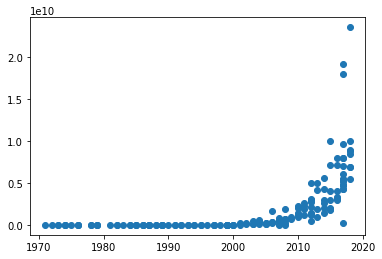

In [ ]:
plt.scatter(X, Y)

In [39]:
Y = np.log(Y)

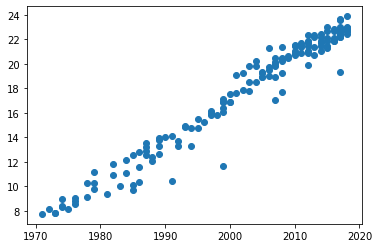

In [40]:
plt.scatter(X, Y)

In [41]:
X = X - np.mean(X)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)    
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
r = model.fit(X, Y, epochs = 200, callbacks = [scheduler])

Epoch 1/200
6/6 [==============================] - 1s 7ms/step - loss: 451.3654 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 320.3160 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 430.2366 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 448.1017 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 207.7050 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 122.7423 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 86.8493 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 73.9160 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 51.4363 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 37.7253 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss: 3

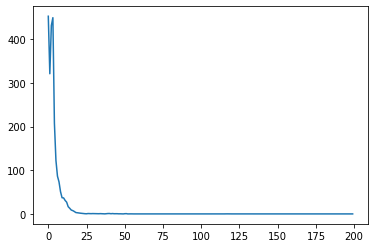

In [42]:
plt.plot(r.history['loss'], label='loss')

In [ ]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34311897]], dtype=float32), array([17.76062], dtype=float32)]


In [ ]:
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.34311897


In [ ]:
print("time to double:", np.log(2)/a)

time to double: 2.0201365998402876


# Preduction

6/6 [==============================] - 0s 3ms/step


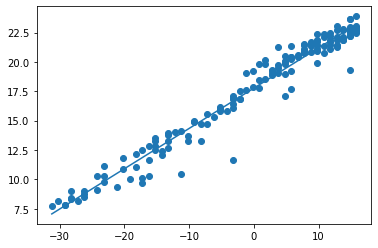

In [44]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Yhat)

In [46]:
# manual calculation

# calculate the weights
w, b = model.layers[0].get_weights()

# resechape X since we flattened it
X = X.reshape(-1,1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# don't use  == for floating points
np.allclose(Yhat, Yhat2)

True